This notebook shows how to apply **post-processing** functions on a **SDF** field for **2D** geometries.

# IMPORTS

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from spomso.cores.helper_functions import generate_grid, smarter_reshape, hard_binarization
from spomso.cores.geom_2d import Circle

from spomso.cores.post_processing import hard_binarization, capped_exponential, relu, gaussian_boundary
from spomso.cores.post_processing import linear_falloff, sigmoid_falloff, gaussian_falloff

# PARAMETERS

In [18]:
# size of the volume
co_size = 4, 4
# resolution of the volume
co_resolution = 400, 400

show = "POSTPROCESSING" # BINARY, FIELD, POSTPROCESSING
show_midplane = True
show_3d = False

# COORDINATE SYSTEM

Point cloud of coordinates is created with the **generate_grid** function, which takes the size of the coordinate system and the number of points in each direction (**co_resolution**).

In [19]:
coor, co_res_new = generate_grid(co_size, co_resolution)

If there is an even number of points along any direction the function will automatically convert it to an odd number, therefore the origin is always included in the point cloud. The point cloud is a **numpy.ndarray** with a shape of **(D, N)**, where **D** is the number of dimensions and **N** is the number of data points.

# CREATE SDFs

Create some geometry for example a **circle** with radius of **0.8**:

In [20]:
final = Circle(0.8)

## EVALUATE

Evaluate the SDF of the **geometry** to create a signed distance field 2D map. This is done by calling the **create** method and passing in the point cloud of coordinates:

In [21]:
final_pattern = final.create(coor)

# POST-PROCESSING

Convert the final pattern into a 2D image:

In [22]:
field = smarter_reshape(final_pattern, co_resolution)

The **SDF** field can be transformed into other scalar fields with various operations.
One of the possibilities is to apply a **post-processing** function on top of the **SDF** field.
There are 7 such predefined **post-processing** functions included in the package:

## CAPPED EXPONENTIAL

Set the **amplitude** of the **capped exponential** post-processing function to **1** and the **width** to **0.5**:

In [23]:
ce = capped_exponential(field, 1.0, 0.5)

## ReLU

Set the **width** parameters of the **ReLU** post-processing function to **1**:

In [24]:
rl = relu(field, 1.0)

## Gaussian Boundary

Set the **amplitude** of the **gaussian boundary** post-processing function to **1** and the **width** to **0.5**:

In [25]:
gb = gaussian_boundary(field, 1.0, 0.5)

## Linear Falloff

Set the **amplitude** of the **linear falloff** post-processing function to **1** and the **width** to **0.5**:

In [26]:
lf = linear_falloff(field, 1.0, 0.5)

## Sigmoid Falloff

Set the **amplitude** of the **sigmoid falloff** post-processing function to **1** and the **width** to **0.5**:

In [27]:
sf = sigmoid_falloff(field, 1.0, 0.5)

## Gaussian Falloff

Set the **amplitude** of the **gaussian falloff** post-processing function to **1** and the **width** to **0.5**:

In [28]:
gf = gaussian_falloff(field, 1.0, 0.5)

## Hard Binarization

Set the **threshold** parameter of the **hard binarization** post-processing function to **0**:

In [29]:
hb = hard_binarization(field, 0)

# BINARIZATION

Convert the distance field to a binary voxel map, where 1 corresponds to the interior and 0 to the exterior of the geometry.

In [30]:
if show_midplane:
    field = smarter_reshape(final_pattern, co_resolution)
    if show=="BINARY":
        pattern_2d = hard_binarization(field, 0)

if show=="BINARY":
    pattern = hard_binarization(final_pattern, 0)

# PLOT

In [31]:
print("Drawing results...")
# Mid-plane cross-section plot
if show_midplane and show=="BINARY":
    fig, ax = plt.subplots(1,1, figsize=(8.25, 8.25))
    ax.imshow(pattern_2d[:, :].T,
              cmap="binary_r",
              extent=(-co_size[0]/2, co_size[0]/2,
                      -co_size[1]/2, co_size[1]/2),
              origin="lower"
              )
    ax.grid()

    fig.tight_layout()
    plt.show()

if show_midplane and show == "FIELD":
    fig, ax = plt.subplots(1, 1, figsize=(8.25, 8.25))
    print(field.shape)
    ax.imshow(field[:, :].T,
              cmap="binary_r",
              extent=(-co_size[0] / 2, co_size[0] / 2,
                      -co_size[1] / 2, co_size[1] / 2),
              origin="lower"
              )
    cs = ax.contour(coor[0].reshape(co_res_new[0], co_res_new[1]),
                    coor[1].reshape(co_res_new[0], co_res_new[1]),
                    field[:, :],
                    cmap="plasma_r")
    ax.clabel(cs, inline=True, fontsize=10)
    ax.grid()

Drawing results...


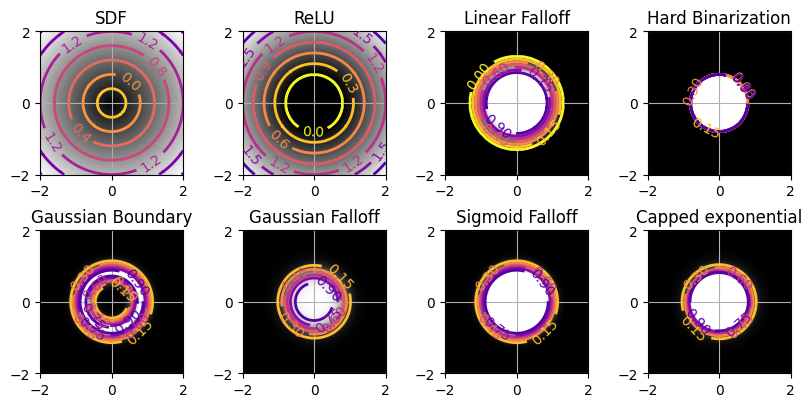

In [32]:
if show_midplane and show=="POSTPROCESSING":
    fig, axs = plt.subplots(2, 4, figsize=(8.25, 8.25/2))

    patterns = ((field, rl, lf, hb), (gb, sf, gf, ce))
    titles = (("SDF", "ReLU", "Linear Falloff", "Hard Binarization"),
              ("Gaussian Boundary", "Gaussian Falloff", "Sigmoid Falloff", "Capped exponential",))
    for i in range(2):
        for j in range(4):
            ax = axs[i, j]
            ax.imshow(patterns[i][j][:, :].T,
                      cmap="binary_r",
                      extent=(-co_size[0]/2, co_size[0]/2,
                              -co_size[1]/2, co_size[1]/2),
                      origin="lower"
                      )
            cs = ax.contour(coor[0].reshape(co_res_new[0], co_res_new[1]),
                            coor[1].reshape(co_res_new[0], co_res_new[1]),
                            patterns[i][j][:, :],
                            cmap="plasma_r",
                            linewidths=2)
            ax.clabel(cs, inline=True, fontsize=10)
            ax.set_xticks(np.linspace(-co_size[0]/2, co_size[0]/2, 3))
            ax.set_yticks(np.linspace(-co_size[1]/2, co_size[1]/2, 3))
            ax.grid()
            ax.set_title(titles[i][j])

    fig.tight_layout()
    plt.show()


if show_3d:
    patterns = ((field, rl, lf, hb), (gb, sf, gf, ce))
    titles = ("SDF", "ReLU", "Linear Falloff", "Hard Binarization",
              "Gaussian Boundary", "Gaussian Falloff", "Sigmoid Falloff", "Capped exponential")

    fig = make_subplots(rows=2, cols=4,
                        specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}, {'is_3d': True}],
                               [{'is_3d': True}, {'is_3d': True}, {'is_3d': True}, {'is_3d': True}]],
                        subplot_titles=titles
                        )

    for i in range(2):
        for j in range(4):
            fig.add_trace(go.Surface(x=coor[0].reshape(co_res_new[0], co_res_new[1]),
                                     y=coor[1].reshape(co_res_new[0], co_res_new[1]),
                                     z=patterns[i][j][:, :],
                                     contours={
                                         "z": {"show": True, "start": 0.0, "end": 1, "size": 0.1}
                                     },
                                     cmin=0,
                                     cmax=1),
                          1+i, 1+j,
                          )

            fig.update_traces(contours_z=dict(show=True, usecolormap=False,
                                              highlightcolor="limegreen", project_z=True))


    fig.show()